# Landmark Measurement Probability Model

only ranging sensors are used

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.stats import norm
%matplotlib inline

In [2]:
sensor_positions = np.array([[0,0], [5,0], [5,8]])
sensor_stdvs = np.ones(3)*0.5
cur_true_pos = np.array([8,4])

In [3]:
def range_sample(sensor_positions, sensor_stdvs, cur_true_pos):
    true_dist = np.linalg.norm(sensor_positions-np.tile(cur_true_pos,(3,1)), axis=1)
    range_tilta = true_dist + np.random.normal(scale=sensor_stdvs)
    return range_tilta

In [4]:
range_tilta = range_sample(sensor_positions, sensor_stdvs, cur_true_pos)
x = np.linspace(-0.5, 11, 1000)
y = np.linspace(-0.5, 8.5, 1000)
X, Y = np.meshgrid(x, y)

In [5]:
def get_resulting_prob_map(X, Y, range_tilta, sensor_positions, sensor_stdvs):
    p_total = np.zeros(X.size)
    for idx in range(len(range_tilta)):
        co_diff = np.stack([X.ravel() - sensor_positions[idx][0], Y.ravel() - sensor_positions[idx][1]])
        dist_vec = np.linalg.norm(co_diff, axis=0)
        pdf_func = norm(scale=sensor_stdvs[idx], loc=range_tilta[idx]).pdf
        p_cur = pdf_func(dist_vec)
        p_total += p_cur
    return p_total.reshape(X.shape)

In [6]:
Z = get_resulting_prob_map(X, Y, range_tilta, sensor_positions, sensor_stdvs)

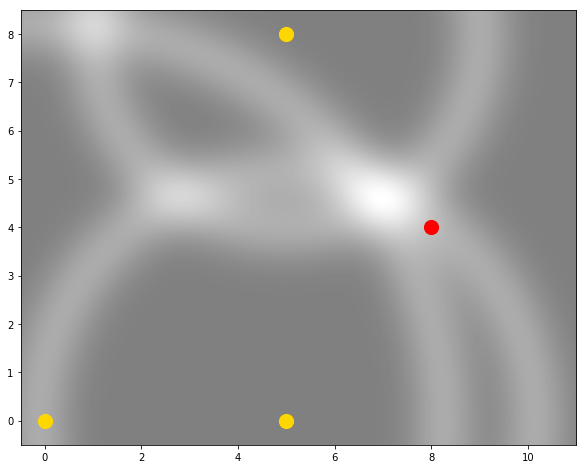

In [7]:
plt.figure(figsize=(10,8))
ax = plt.gca()
ax.set_xlim([-0.5,11])
ax.set_ylim(-0.5,8.5)
plt.scatter(sensor_positions[:,0], sensor_positions[:,1], c='gold', s=200)
plt.scatter(cur_true_pos[0], cur_true_pos[1], c='red', s=200)
im = plt.imshow(Z, cmap=plt.get_cmap('gist_gray'), 
                origin='lower', extent=[-0.5, 11, -0.5, 8.5],
                vmax=abs(Z).max(), vmin=-abs(Z).max())
plt.show()